# Telecom Churn

##### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition

##### Business Goal
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To serve the business oblective we build predictive models to serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing   
   this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why 
   customers choose to switch to other networks.

##### Solution
Solution steps will include:
1. Data understanding
2. Data Cleaning
3. Create derived variables
4. Find High Value Customers
5. Tag churners and remove attributes of the churn phase
6. Develop models:
	- Use PCA vor variable reduction and create a predictive model
	- Develop an interpretable model without PCA and find variables with significant impact


### Assigning Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.metrics import sensitivity_specificity_support


In [2]:
import sklearn
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold



### Data Understanding

In [3]:
# Reading the data from csv file
churn = pd.read_csv ("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
#Describe data
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
churn.shape

(99999, 226)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
#Identify ID variables
ids = ['mobile_number', 'circle_id']

In [8]:
#Identify categorical variables
catagories =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [9]:
#Identify Date variables
date = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

In [10]:
#Identify numeric columns
number_columns = [column for column in churn.columns if column not in ids + date + catagories]

In [11]:
#Drop ids and date 
churn = churn.drop(ids + date, axis=1)

In [12]:
#Check missing data 
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou       1.018010
std_og_t2o_mou       1.018010
loc_ic_t2o_mou       1.018010
arpu_6               0.000000
arpu_7               0.000000
arpu_8               0.000000
arpu_9               0.000000
onnet_mou_6          3.937039
onnet_mou_7          3.859039
onnet_mou_8          5.378054
onnet_mou_9          7.745077
offnet_mou_6         3.937039
offnet_mou_7         3.859039
offnet_mou_8         5.378054
offnet_mou_9         7.745077
roam_ic_mou_6        3.937039
roam_ic_mou_7        3.859039
roam_ic_mou_8        5.378054
roam_ic_mou_9        7.745077
roam_og_mou_6        3.937039
roam_og_mou_7        3.859039
roam_og_mou_8        5.378054
roam_og_mou_9        7.745077
loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8     5.378054
                      ...    
arpu_2g_9           74.077741
night_pck_user_6    74.846748
night_pck_

In [13]:
#Recharge variables for 4 months
recharge = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9','total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',]
churn[recharge].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,252.0,252.0,252.0,NaN
1,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [14]:
#impute values in recharge column with zero
rechargeColumns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
churn[rechargeColumns] = churn[rechargeColumns].apply(lambda x: x.fillna(0))

In [15]:
churn[rechargeColumns].isnull().sum()*100/churn.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [16]:
# checking shape 
churn.shape

(99999, 212)

In [17]:
# Creating a new category(-1) for the case where the value of the column is NA
churn[catagories] = churn[catagories].apply(lambda x: x.fillna(-1))

In [18]:
churn[catagories].isnull().sum()*100/churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [19]:
#Droping the columns with more than 70% missing values
cols_drop = churn.columns[churn.isnull().mean()>0.7]
churn.drop(cols_drop, axis=1,inplace=True)
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,...,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,0,-1.0,1.0,1.0,-1.0,1006,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,0,-1.0,-1.0,-1.0,1.0,1103,0.0,0.0,4.17,0.00
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,0,-1.0,-1.0,-1.0,-1.0,2491,0.0,0.0,0.00,0.00
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,0,0.0,-1.0,-1.0,-1.0,1526,0.0,0.0,0.00,0.00


In [20]:
churn.shape

(99999, 196)

## Imputation

#### Fancy Impute
#### Uncomment and run the below code to see the results with imputation using fancyimpute
#### Manual imputaion has also been done below

In [21]:
# iterativeimputor inorder to impute missing values of columns
#churn_cols = churn.columns
#from fancyimpute import IterativeImputer
#churn_df_imputed = pd.DataFrame(IterativeImputer().fit_transform(churn))
#churn_df_imputed.columns = churn_cols
#churn_df_imputed.head()

In [22]:
#Check after imputation
#churn = pd.DataFrame(churn_df_imputed, columns=churn_cols)
#churn.isnull().sum()*100/churn.shape[0]

In [23]:
churn_cols = churn.columns
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
arpu_6              0.000000
arpu_7              0.000000
arpu_8              0.000000
arpu_9              0.000000
onnet_mou_6         3.937039
onnet_mou_7         3.859039
onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_6        3.937039
offnet_mou_7        3.859039
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_6       3.937039
roam_ic_mou_7       3.859039
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_6       3.937039
roam_og_mou_7       3.859039
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_6    3.937039
loc_og_t2t_mou_7    3.859039
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_6    3.937039
loc_og_t2m_mou_7    3.859039
loc_og_t2m_mou_8    5.378054
                      ...   
vol_3g_mb_9         0.000000
night_pck_user_6    0.000000
night_pck_user_7    0.000000
night_pck_user

In [24]:
# Identify columns with only 1 value as they will not help in model scoring
print(churn.nunique().sort_values())
print('number of columns:', churn.shape[1])

loc_og_t2o_mou          1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_6        1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
night_pck_user_8        3
night_pck_user_9        3
fb_user_8               3
fb_user_9               3
night_pck_user_7        3
night_pck_user_6        3
fb_user_6               3
fb_user_7               3
monthly_2g_9            5
monthly_2g_6            5
monthly_2g_8            6
monthly_2g_7            6
monthly_3g_9           11
monthly_3g_6           12
monthly_3g_8           12
monthly_3g_7           15
sachet_3g_6            25
sachet_3g_9            27
sachet_3g_7            27
                    ...  
onnet_mou_6         24313
onnet_mou_7         24336
loc_og_mou_9        25376
loc_og_mou_8        25990
loc_og_mou_7        26091
loc_og_mou_6        26372
std_og_mou_9        26553
std_og_mou_8

In [25]:
# drop columns with single value        
drop_cols = list(filter(lambda x : len(churn[x].value_counts()) < 2, churn.columns))
churn.drop(drop_cols,axis=1, inplace=True)   

#checking for unique values after droping col with single value
churn.nunique().sort_values()

night_pck_user_7         3
fb_user_9                3
fb_user_8                3
fb_user_7                3
fb_user_6                3
night_pck_user_9         3
night_pck_user_8         3
night_pck_user_6         3
monthly_2g_6             5
monthly_2g_9             5
monthly_2g_8             6
monthly_2g_7             6
monthly_3g_9            11
monthly_3g_8            12
monthly_3g_6            12
monthly_3g_7            15
sachet_3g_6             25
sachet_3g_7             27
sachet_3g_9             27
sachet_3g_8             29
sachet_2g_6             32
sachet_2g_9             32
sachet_2g_8             34
sachet_2g_7             35
total_rech_data_9       38
total_rech_data_6       38
total_rech_data_7       43
total_rech_data_8       47
max_rech_data_7         49
max_rech_data_6         49
                     ...  
onnet_mou_6          24313
onnet_mou_7          24336
loc_og_mou_9         25376
loc_og_mou_8         25990
loc_og_mou_7         26091
loc_og_mou_6         26372
s

In [26]:
churn.shape

(99999, 185)

##### Create derived variables

In [27]:
#Calculating recharge amount total for data in the month of June and July 
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7
churn['total_data_rech_8'] = churn.total_rech_data_8 * churn.av_rech_amt_data_8

In [28]:
#Calculating recharge amount total in month June and July
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7
churn['amt_data_8'] = churn.total_rech_amt_8 + churn.total_data_rech_8

In [29]:
#Calculating average recharge done by customer in month June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

##### Tag Churners

In [30]:
churn.shape

(99999, 192)

In [31]:
#Calculating data consumption
churn['total_internet_mb_9'] =  churn.vol_2g_mb_9 + churn.vol_3g_mb_9

In [32]:
#Calculating total usage
churn['total_calls_mou_9'] = churn.total_ic_mou_9 + churn.total_og_mou_9

In [33]:
churn['churn'] = churn.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [34]:
churn = churn.filter(regex='[^9]$', axis=1)
churn.shape

(99999, 148)

##### Handling Missing Values

In [35]:
#Check percentage of missing data 
pd.options.display.float_format = '{:.2f}'.format
miss_val = pd.DataFrame((churn.isnull().sum()/len(churn))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
miss_val

,feature,Missing%
74,std_ic_t2f_mou_8,5.38
56,loc_ic_t2t_mou_8,5.38
41,std_og_mou_8,5.38
65,loc_ic_mou_8,5.38
23,loc_og_t2f_mou_8,5.38
62,loc_ic_t2f_mou_8,5.38
26,loc_og_t2c_mou_8,5.38
59,loc_ic_t2m_mou_8,5.38
29,loc_og_mou_8,5.38
17,loc_og_t2t_mou_8,5.38


In [36]:
# Dropping some of the raw variables as we already have total variables for them

drop_vars = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',]

churn.drop(drop_vars, axis = 1, inplace = True)

churn.shape

(99999, 109)

In [37]:
#Check percentage of missing data 
pd.options.display.float_format = '{:.2f}'.format
miss_val = pd.DataFrame((churn.isnull().sum()/len(churn))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
miss_val

,feature,Missing%
29,og_others_8,5.38
8,offnet_mou_8,5.38
17,loc_og_mou_8,5.38
23,isd_og_mou_8,5.38
14,roam_og_mou_8,5.38
11,roam_ic_mou_8,5.38
47,isd_ic_mou_8,5.38
44,spl_ic_mou_8,5.38
26,spl_og_mou_8,5.38
38,std_ic_mou_8,5.38


In [38]:
# Imputing the churn phase (month 8) variables with missing values. 
# As the corresponding variables in good phase have values, we can infer that the values for these variables in churn phase 
# missing values will be zero rather than imputing with mean/mode as that my skew the results

impute_zero = ['og_others_8', 'offnet_mou_8', 'loc_og_mou_8', 'isd_og_mou_8', 'roam_og_mou_8', 'std_og_mou_8', 
                'ic_others_8', 'isd_ic_mou_8', 'onnet_mou_8', 'spl_ic_mou_8',
                'loc_ic_mou_8', 'std_ic_mou_8', 'roam_ic_mou_8', 'spl_og_mou_8']


In [39]:
for col in impute_zero:
    churn[col].fillna(0, inplace=True)
pd.options.display.float_format = '{:.2f}'.format
miss_val = pd.DataFrame((churn.isnull().sum()/len(churn))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
miss_val

,feature,Missing%
45,isd_ic_mou_6,3.94
9,roam_ic_mou_6,3.94
18,std_og_mou_6,3.94
24,spl_og_mou_6,3.94
15,loc_og_mou_6,3.94
27,og_others_6,3.94
12,roam_og_mou_6,3.94
33,loc_ic_mou_6,3.94
21,isd_og_mou_6,3.94
36,std_ic_mou_6,3.94


In [40]:
churn.shape

(99999, 109)

In [41]:
# Imputing the good phase (month 6&7) variables with missing values. 
#Small percentage of these variables is missing. These are raw variables on basis of which total variables are derived. 
# missing values are expected in them based on usage and imputing them with mean/mode would lead to incorrect output

impute_zero = ['roam_og_mou_6', 'isd_ic_mou_6', 'roam_ic_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'loc_og_mou_6',
                'spl_ic_mou_6', 'loc_ic_mou_6', 'og_others_6', 'onnet_mou_6', 'offnet_mou_6',
                'std_ic_mou_6', 'ic_others_6', 'isd_og_mou_6', 'std_og_mou_7', 'roam_og_mou_7',
                'loc_og_mou_7', 'roam_ic_mou_7', 'spl_ic_mou_7', 'loc_ic_mou_7', 'isd_og_mou_7',
                'spl_og_mou_7', 'std_ic_mou_7', 'og_others_7', 'onnet_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'offnet_mou_7']




In [42]:
for col in impute_zero:
    churn[col].fillna(0, inplace=True)
pd.options.display.float_format = '{:.2f}'.format
miss_val = pd.DataFrame((churn.isnull().sum()/len(churn))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
miss_val

,feature,Missing%
0,arpu_6,0.00
69,av_rech_amt_data_6,0.00
80,night_pck_user_8,0.00
79,night_pck_user_7,0.00
78,night_pck_user_6,0.00
77,vol_3g_mb_8,0.00
76,vol_3g_mb_7,0.00
75,vol_3g_mb_6,0.00
74,vol_2g_mb_8,0.00
73,vol_2g_mb_7,0.00


In [43]:
churn.shape

(99999, 109)

In [44]:
list1=[x for x in miss_val.feature]

In [45]:
list1

['arpu_6',
 'av_rech_amt_data_6',
 'night_pck_user_8',
 'night_pck_user_7',
 'night_pck_user_6',
 'vol_3g_mb_8',
 'vol_3g_mb_7',
 'vol_3g_mb_6',
 'vol_2g_mb_8',
 'vol_2g_mb_7',
 'vol_2g_mb_6',
 'av_rech_amt_data_8',
 'av_rech_amt_data_7',
 'max_rech_data_8',
 'total_rech_amt_7',
 'max_rech_data_7',
 'max_rech_data_6',
 'total_rech_data_8',
 'total_rech_data_7',
 'total_rech_data_6',
 'last_day_rch_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_6',
 'max_rech_amt_8',
 'max_rech_amt_7',
 'max_rech_amt_6',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'av_amt_data_6_7',
 'amt_data_8',
 'amt_data_7',
 'amt_data_6',
 'total_data_rech_8',
 'total_data_rech_7',
 'total_data_rech_6',
 'sep_vbc_3g',
 'jun_vbc_3g',
 'jul_vbc_3g',
 'aug_vbc_3g',
 'aon',
 'fb_user_8',
 'fb_user_7',
 'fb_user_6',
 'sachet_3g_8',
 'sachet_3g_7',
 'sachet_3g_6',
 'monthly_3g_8',
 'monthly_3g_7',
 'monthly_3g_6',
 'sachet_2g_8',
 'sachet_2g_7',
 'total_rech_amt_8',
 'total_rech_amt_6',
 'arpu_

##### Tag High Value Customers

In [46]:
#Taking only top 20% people who are responsible for 80% oof revenue
#churnTop = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
#churnTop = churnTop.reset_index(drop=True)
#churnTop.shape

rech_amt_6_7 = churn[['total_data_rech_6','total_data_rech_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

quantile_amt = np.quantile(rech_amt_6_7, 0.70)

# drop-out the customers having less than 70th percentile average rechange amount
churnTop = churn[rech_amt_6_7 >= quantile_amt]

In [47]:
#Checking the counts of churn and not churn 
churnTop['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [48]:
#Deleting variables created to segregate high-value customers
churnTop = churnTop.drop(['total_data_rech_6', 'total_data_rech_7','amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churnTop.shape

(30001, 104)

In [49]:
# extract all names that end with 9 and updating the lists
col_sep = churn.filter(regex='9$', axis=1).columns
catagories = [col for col in catagories if col not in col_sep]
catagories.append('churn')
num_cols = [col for col in churnTop.columns if col not in catagories]

In [50]:
churnTop.shape

(30001, 104)

In [51]:
# change data type of columns to category
churnTop.churn = churnTop.churn.astype("category")


#### Deriving a variable.
###### The person is more likely to churn when he or she reduces the amount of recharge, the frequency of recharge or usage on the whole.
###### Calculating the difference between 8th month and the average of 6th and 7th month

In [52]:
churnTop['vol_3g_mb_diff'] = churnTop.vol_3g_mb_8 - ((churnTop.vol_3g_mb_6 + churnTop.vol_3g_mb_7)/2)
churnTop['total_ic_mou_diff'] = churnTop.total_ic_mou_8 - ((churnTop.total_ic_mou_6 + churnTop.total_ic_mou_7)/2)
churnTop['onnet_mou_diff'] = churnTop.onnet_mou_8 - ((churnTop.onnet_mou_6 + churnTop.onnet_mou_7)/2)
churnTop['offnet_mou_diff'] = churnTop.offnet_mou_8 - ((churnTop.offnet_mou_6 + churnTop.offnet_mou_7)/2)
churnTop['total_rech_data_diff'] = churnTop.total_rech_data_8 - ((churnTop.total_rech_data_6 + churnTop.total_rech_data_7)/2)
churnTop['roam_ic_mou_diff'] = churnTop.roam_ic_mou_8 - ((churnTop.roam_ic_mou_6 + churnTop.roam_ic_mou_7)/2)
churnTop['av_rech_amt_data_diff'] = churnTop.av_rech_amt_data_8 - ((churnTop.av_rech_amt_data_6 + churnTop.av_rech_amt_data_7)/2)
churnTop['roam_og_mou_diff'] = churnTop.roam_og_mou_8 - ((churnTop.roam_og_mou_6 + churnTop.roam_og_mou_7)/2)
churnTop['total_rech_num_diff'] = churnTop.total_rech_num_8 - ((churnTop.total_rech_num_6 + churnTop.total_rech_num_7)/2)
churnTop['loc_og_mou_diff'] = churnTop.loc_og_mou_8 - ((churnTop.loc_og_mou_6 + churnTop.loc_og_mou_7)/2)
churnTop['std_og_mou_diff'] = churnTop.std_og_mou_8 - ((churnTop.std_og_mou_6 + churnTop.std_og_mou_7)/2)
churnTop['vol_2g_mb_diff'] = churnTop.vol_2g_mb_8 - ((churnTop.vol_2g_mb_6 + churnTop.vol_2g_mb_7)/2)
churnTop['isd_og_mou_diff'] = churnTop.isd_og_mou_8 - ((churnTop.isd_og_mou_6 + churnTop.isd_og_mou_7)/2)
churnTop['spl_og_mou_diff'] = churnTop.spl_og_mou_8 - ((churnTop.spl_og_mou_6 + churnTop.spl_og_mou_7)/2)
churnTop['total_rech_amt_diff'] = churnTop.total_rech_amt_8 - ((churnTop.total_rech_amt_6 + churnTop.total_rech_amt_7)/2)
churnTop['total_og_mou_diff'] = churnTop.total_og_mou_8 - ((churnTop.total_og_mou_6 + churnTop.total_og_mou_7)/2)
churnTop['loc_ic_mou_diff'] = churnTop.loc_ic_mou_8 - ((churnTop.loc_ic_mou_6 + churnTop.loc_ic_mou_7)/2)
churnTop['max_rech_amt_diff'] = churnTop.max_rech_amt_8 - ((churnTop.max_rech_amt_6 + churnTop.max_rech_amt_7)/2)
churnTop['arpu_diff'] = churnTop.arpu_8 - ((churnTop.arpu_6 + churnTop.arpu_7)/2)
churnTop['std_ic_mou_diff'] = churnTop.std_ic_mou_8 - ((churnTop.std_ic_mou_6 + churnTop.std_ic_mou_7)/2)
churnTop['isd_ic_mou_diff'] = churnTop.isd_ic_mou_8 - ((churnTop.isd_ic_mou_6 + churnTop.isd_ic_mou_7)/2)
churnTop['spl_ic_mou_diff'] = churnTop.spl_ic_mou_8 - ((churnTop.spl_ic_mou_6 + churnTop.spl_ic_mou_7)/2)
churnTop['max_rech_data_diff'] = churnTop.max_rech_data_8 - ((churnTop.max_rech_data_6 + churnTop.max_rech_data_7)/2)

### Univariate EDA

In [53]:
list2=['total_og_mou_6','total_rech_num_7','total_og_mou_7','aon','total_rech_num_7'
         ,'max_rech_amt_7','arpu_6','total_rech_data_8' ]


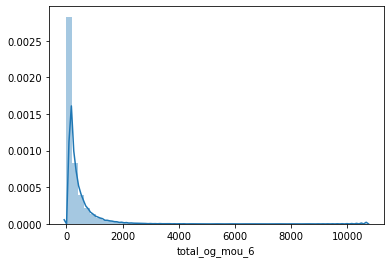

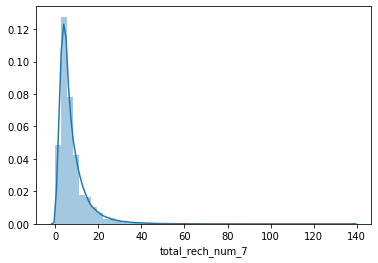

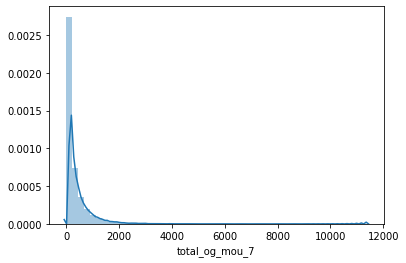

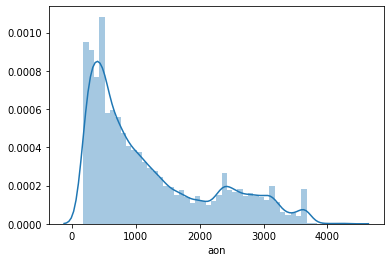

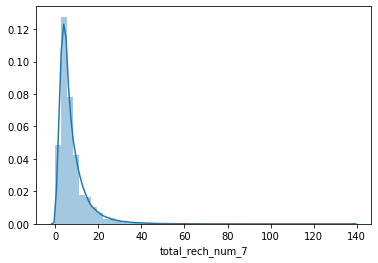

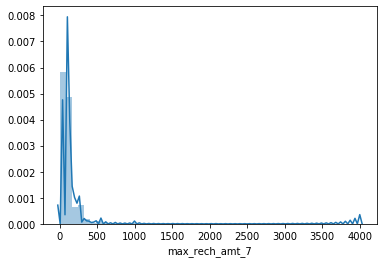

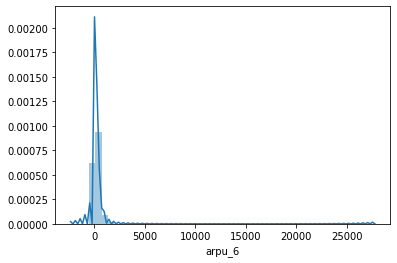

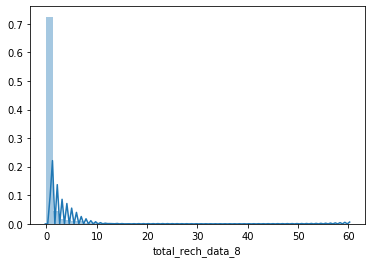

In [54]:
for x in list2:    
    sns.distplot(churn[x],label= x ,color=None)
    plt.show()

Most of the variables are skewed (right skewed distribution) 

### Bivariate EDA

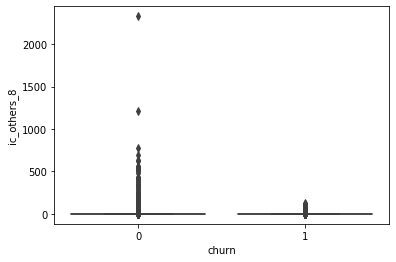

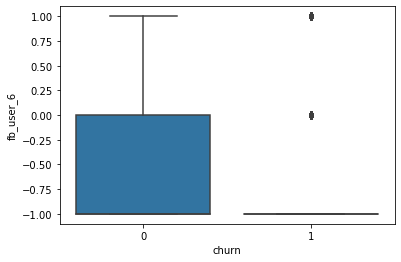

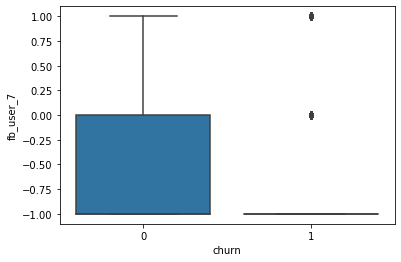

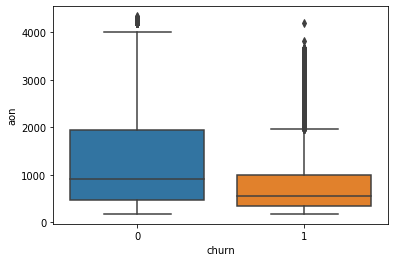

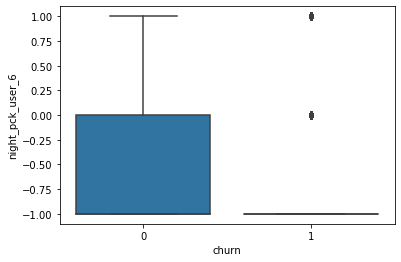

In [55]:
list2=['ic_others_8','fb_user_6','fb_user_7','aon','night_pck_user_6',]
for a in list2:
    sns.boxplot(churn['churn'], churn[a])
    plt.show()

### Handling outliers

In [56]:
def outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [57]:
churnTop[num_cols] = churnTop[num_cols].apply(outliers, axis=0)

### Dividing data in training and test data

In [58]:
# divide data into train and test
X = churnTop.drop("churn", axis = 1)
y = churnTop.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 45, stratify = y)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 126)
(21000,)
(9001, 126)
(9001,)


In [61]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},'fb_user_6': {-1: 0.099165, 0: 0.069460, 1: 0.067124},'fb_user_7': {-1: 0.115746, 0: 0.059305, 1: 0.055082},'fb_user_8': {-1: 0.141108, 0: 0.066887, 1: 0.024463}}
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [62]:
X_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 94689 to 67764
Data columns (total 126 columns):
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_mou_6             float64
loc_og_mou_7             float64
loc_og_mou_8             float64
std_og_mou_6             float64
std_og_mou_7             float64
std_og_mou_8             float64
isd_og_mou_6             float64
isd_og_mou_7             float64
isd_og_mou_8             float64
spl_og_mou_6             float64
spl_og_mou_7             float64
spl_og_mou_8             flo

### Checking for Data Imbalance

In [63]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1709
Before OverSampling, counts of label '0': 19291 

Before OverSampling, churn event rate : 8.14% 



### Handling imbalance
##### Using Synthetic Minority Oversampling Technique (SMOTE) 

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [65]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38582, 126)
After OverSampling, the shape of train_y: (38582,) 

After OverSampling, counts of label '1': 19291
After OverSampling, counts of label '0': 19291
After OverSampling, churn event rate : 50.0% 



In [66]:
y_train_res.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: category
Categories (2, int64): [0, 1]

### Model Build

In [67]:
def fit_model(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [68]:
def model_perform(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
   
    print('Accuracy : {}'.format(metrics.accuracy_score(actual_churn, pred_churn)))
 
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))

    print('Specificity: {}'.format(TN / float(TN+FP)))

    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))

    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    
    

## Base Model - logistic regression

In [69]:
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_reg = LogisticRegression(class_weight='balanced')
fit_model(logistic_reg, X_train_res, y_train_res)


Model Report
Accuracy : 0.8334
Recall/Sensitivity : 0.8398
AUC Score (Train): 0.901716
CV Score : Mean - 0.9005871 | Std - 0.004303909 | Min - 0.8960839 | Max - 0.9064693


In [70]:
def predict_chrun_proba(model,X,y,prob):
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    
    model_perform(y_df.churn,y_df.final_predicted)
    return y_df

In [71]:
## We are choosing 0.5 cutoff

# Prediction on train data
cut_off_prob=0.5
y_train_df_base = predict_chrun_proba(logistic_reg,X_train_res,y_train_res,cut_off_prob)
y_train_df_base.head()

Roc_auc_score : 0.8334197294074958
Accuracy : 0.8334197294074958
Sensitivity/Recall : 0.8397698408584314
Specificity: 0.8270696179565601
False Positive Rate: 0.17293038204343994
sklearn precision score value: 0.8292383292383292


,churn,churn_Prob,final_predicted
0,0,0.73,1
1,0,0.35,0
2,0,0.02,0
3,0,0.09,0
4,0,0.09,0


#### We are getting 83.33% accuracy for train data

In [72]:
# Prediction on test data
pred_test_base = logistic_reg.predict(X_test)
model_perform(y_test,pred_test_base)

Roc_auc_score : 0.8289964922645445
Accuracy : 0.8287968003555161
Sensitivity/Recall : 0.8292349726775956
Specificity: 0.8287580118514936
False Positive Rate: 0.17124198814850647
sklearn precision score value: 0.30004943153732083


#### We are getting 82.90% accuracy for test data


### logistic regression with L1 Regularisation

In [73]:
# show the effect of the regularization parameter C on the coefficients and model accuracy.
C = [.01, .001,.0001] # regularization parameter

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('λ:', c)
   # print('Coefficient of each feature:', clf.coef_)
    a=(clf.score(X_train, y_train))*100
    print('Training accuracy:', a)
    b=(clf.score(X_test, y_test))*100
    print('Test accuracy:',b )
    print('')



λ: 0.01
Training accuracy: 93.4
Test accuracy: 93.60071103210754

λ: 0.001
Training accuracy: 93.4095238095238
Test accuracy: 93.67848016887012

λ: 0.0001
Training accuracy: 93.06666666666666
Test accuracy: 93.50072214198423



## Performing PCA

In [74]:
# performing PCA
variance_ratio={}
for n in range(2,100):
    pca = PCA(n_components=n, svd_solver='randomized', random_state=100)
    PCA_1 = pca.fit(X_train_res)
    variance_ratio[n]=sum(PCA_1.explained_variance_ratio_)

Text(0, 0.5, 'cumulative_explained_varaince')

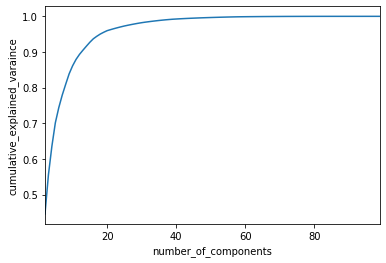

In [75]:
pd.Series(variance_ratio).plot()
plt.xlabel('number_of_components')
plt.ylabel('cumulative_explained_varaince')

In [76]:
# observing variance ratio
variance_ratio

{2: 0.4453856706032136,
 3: 0.5555125109366552,
 4: 0.6355315497083064,
 5: 0.7012453047099039,
 6: 0.7438647412300108,
 7: 0.779070133445533,
 8: 0.8094148368973481,
 9: 0.8387048249362996,
 10: 0.8611220098410223,
 11: 0.8791516209624611,
 12: 0.8932712502656619,
 13: 0.905047261667173,
 14: 0.9163096928965699,
 15: 0.9272636121745458,
 16: 0.9369623918309489,
 17: 0.9439775656986019,
 18: 0.9501840396335077,
 19: 0.9552318421102898,
 20: 0.9597868170782186,
 21: 0.9626795377834039,
 22: 0.9654637243223947,
 23: 0.968078311796504,
 24: 0.9705757397882959,
 25: 0.9729015228468851,
 26: 0.9749645864108595,
 27: 0.9769304092745444,
 28: 0.978775883284191,
 29: 0.9805380731759782,
 30: 0.9821565629252819,
 31: 0.9835834663267635,
 32: 0.9848640134582607,
 33: 0.9861039173727028,
 34: 0.9872497326242209,
 35: 0.9883395076955658,
 36: 0.9893538234120538,
 37: 0.9902967371594074,
 38: 0.9911173816726064,
 39: 0.9918838395105327,
 40: 0.9924795353020546,
 41: 0.9930450677129169,
 42: 0.99355

In [77]:

#-We'll choose 20 components as 95% variance is covered by 20 components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38582, 20)

In [78]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 20)

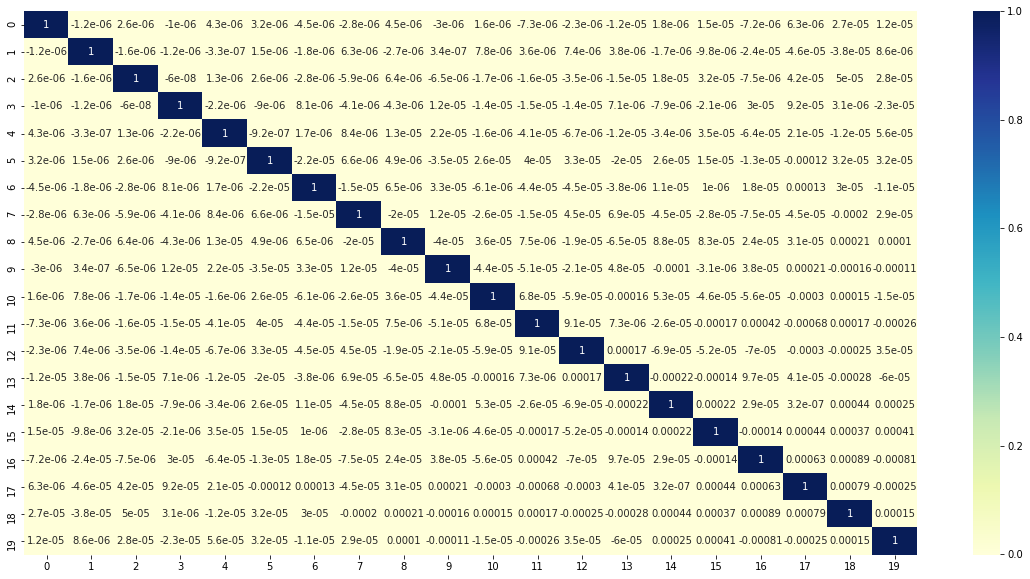

In [79]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(X_train_pca.transpose()), cmap="YlGnBu", annot = True)

## Logistic Regression with PCA

In [80]:
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_reg_pca = LogisticRegression(class_weight='balanced')

# model performance
fit_model(logistic_reg_pca, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8201
Recall/Sensitivity : 0.8471
AUC Score (Train): 0.894925
CV Score : Mean - 0.8945946 | Std - 0.003994975 | Min - 0.8898891 | Max - 0.9009413


In [81]:
## We are choosing 0.5 cutoff

cut_off_prob=0.5
y_train_df_pca = predict_chrun_proba(logistic_reg_pca,X_train_pca,y_train_res,cut_off_prob)
y_train_df_pca.head()



Roc_auc_score : 0.8201492924161526
Accuracy : 0.8201492924161526
Sensitivity/Recall : 0.8470789487325696
Specificity: 0.7932196360997357
False Positive Rate: 0.20678036390026439
sklearn precision score value: 0.803787506148549


,churn,churn_Prob,final_predicted
0,0,0.52,1
1,0,0.07,0
2,0,0.01,0
3,0,0.10,0
4,0,0.09,0


#### We are getting 82.01% accuracy for train data


In [82]:
# predictions on Test data
pred_probs_test_pca = logistic_reg_pca.predict(X_test_pca)
model_perform(y_test,pred_probs_test_pca)

Roc_auc_score : 0.8152212952848449
Accuracy : 0.7989112320853239
Sensitivity/Recall : 0.8346994535519126
Specificity: 0.7957431370177772
False Positive Rate: 0.20425686298222276
sklearn precision score value: 0.26565217391304347


#### We are getting 79.89% accuracy for test data


#### Plotting ROC curve

In [83]:
  def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None #fpr, tpr, thresholds

<Figure size 720x720 with 0 Axes>

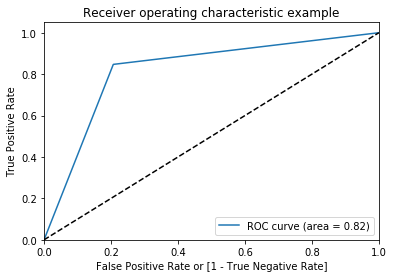

In [84]:
plt.figure(figsize = (10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train_df_pca.churn, y_train_df_pca.final_predicted, drop_intermediate = False )
draw_roc(y_train_df_pca.churn, y_train_df_pca.final_predicted)

In [85]:
# Find optimal cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df_pca[i]= y_train_df_pca.churn_Prob.map( lambda x: 1 if x > i else 0)
y_train_df_pca.head()

,churn,churn_Prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.52,1,1,1,1,1,1,1,0,0,0,0
1,0,0.07,0,1,0,0,0,0,0,0,0,0,0
2,0,0.01,0,1,0,0,0,0,0,0,0,0,0
3,0,0.10,0,1,1,0,0,0,0,0,0,0,0
4,0,0.09,0,1,0,0,0,0,0,0,0,0,0


#### Finding Optimal Cutoff

In [86]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_train_df_pca.churn, y_train_df_pca[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   0.00   1.00
0.10  0.10      0.67   0.38   0.97
0.20  0.20      0.73   0.51   0.95
0.30  0.30      0.77   0.63   0.92
0.40  0.40      0.80   0.72   0.89
0.50  0.50      0.82   0.79   0.85
0.60  0.60      0.83   0.86   0.80
0.70  0.70      0.82   0.92   0.72
0.80  0.80      0.75   0.96   0.53
0.90  0.90      0.59   0.99   0.20


#### We choose 0.5 as our cutoff

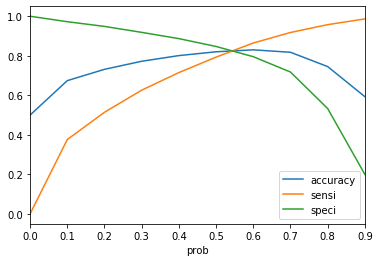

In [87]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
## We are choosing 0.5 cutoff

# acuracy for cutoff o.5
print(metrics.accuracy_score(y_train_df_pca.churn, y_train_df_pca.final_predicted))

0.8201492924161526


## Decision Tree Model

In [89]:
# here we are applying decision tree algorithm on our dataset

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
#from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

Dtree_final = DecisionTreeClassifier(class_weight='balanced',
                             min_samples_split=200,
                             min_samples_leaf=200,
                             max_depth=25,
                             random_state=45)
fit_model(Dtree_final, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8286
Recall/Sensitivity : 0.8301
AUC Score (Train): 0.909927
CV Score : Mean - 0.8934659 | Std - 0.002237817 | Min - 0.8906203 | Max - 0.8971243


In [92]:
## We are choosing 0.5 cutoff

# predicting on training data
cut_off_prob = 0.5
y_train_df_dt = predict_chrun_proba(Dtree_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df_dt.head()

Roc_auc_score : 0.8285729096469856
Accuracy : 0.8285729096469856
Sensitivity/Recall : 0.8300762013374112
Specificity: 0.8270696179565601
False Positive Rate: 0.17293038204343994
sklearn precision score value: 0.8275879890433614


,churn,churn_Prob,final_predicted
0,0,0.40,0
1,0,0.18,0
2,0,0.02,0
3,0,0.19,0
4,0,0.01,0


#### We are getting 82.85% accuracy for train data


In [93]:

# make predictions on test data
pred_test_dt = Dtree_final.predict(X_test_pca)

model_perform(actual_churn=y_test,pred_churn=pred_test_dt)

Roc_auc_score : 0.7953138392323161
Accuracy : 0.8172425286079325
Sensitivity/Recall : 0.7691256830601093
Specificity: 0.821501995404523
False Positive Rate: 0.17849800459547707
sklearn precision score value: 0.27611574301128006


#### We are getting 81.72% accuracy for test data


<Figure size 720x720 with 0 Axes>

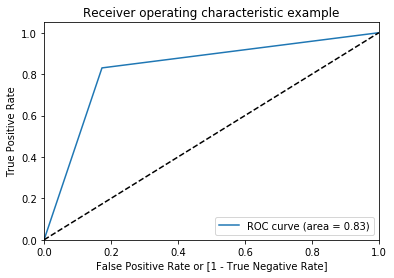

In [94]:
plt.figure(figsize = (10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train_df_dt.churn, y_train_df_dt.final_predicted, drop_intermediate = False )
draw_roc(y_train_df_dt.churn, y_train_df_dt.final_predicted)

In [95]:
# Find optimal cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df_dt[i]= y_train_df_dt.churn_Prob.map( lambda x: 1 if x > i else 0)
y_train_df_dt.head()

,churn,churn_Prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.40,0,1,1,1,1,0,0,0,0,0,0
1,0,0.18,0,1,1,0,0,0,0,0,0,0,0
2,0,0.02,0,1,0,0,0,0,0,0,0,0,0
3,0,0.19,0,1,1,0,0,0,0,0,0,0,0
4,0,0.01,0,1,0,0,0,0,0,0,0,0,0


In [96]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_train_df_dt.churn, y_train_df_dt[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.56   0.12   1.00
0.10  0.10      0.68   0.37   0.99
0.20  0.20      0.77   0.58   0.95
0.30  0.30      0.81   0.71   0.91
0.40  0.40      0.83   0.78   0.87
0.50  0.50      0.83   0.83   0.83
0.60  0.60      0.82   0.87   0.77
0.70  0.70      0.80   0.93   0.67
0.80  0.80      0.79   0.95   0.63
0.90  0.90      0.71   0.98   0.44


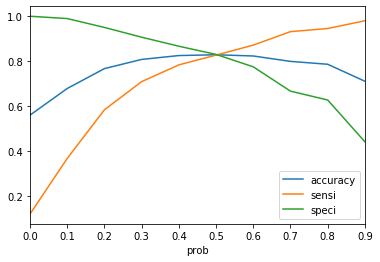

In [97]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [98]:
## We are choosing 0.5 cutoff

# accuracy. for cutoff o.5
print(metrics.accuracy_score(y_train_df_dt.churn, y_train_df_dt.final_predicted))

0.8285729096469856


## Random Forest Model

In [99]:
# here we are applying random forest algorithm on our data
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=700, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, random_state=47, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

fit_model(RF_model, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8348
Recall/Sensitivity : 0.7967
AUC Score (Train): 0.915063
CV Score : Mean - 0.9017524 | Std - 0.001308412 | Min - 0.9001325 | Max - 0.9035786


In [100]:
## We are choosing 0.5 cutoff

# predicting on test data
cut_off_prob = 0.5
y_train_df_rf = predict_chrun_proba(RF_model,X_train_pca,y_train_res,cut_off_prob)
y_train_df_rf.head()

Roc_auc_score : 0.8348193458089265
Accuracy : 0.8348193458089265
Sensitivity/Recall : 0.7967445959255611
Specificity: 0.8728940956922917
False Positive Rate: 0.12710590430770827
sklearn precision score value: 0.8624172371226574


,churn,churn_Prob,final_predicted
0,0,0.46,0
1,0,0.25,0
2,0,0.06,0
3,0,0.21,0
4,0,0.16,0


#### We are getting 83.48% accuracy for train data


In [101]:
# make predictions on test data
pred_test_rf = RF_model.predict(X_test_pca)

model_perform(actual_churn=y_test,pred_churn=pred_test_rf)

Roc_auc_score : 0.8031608939042194
Accuracy : 0.8556827019220087
Sensitivity/Recall : 0.7404371584699454
Specificity: 0.8658846293384932
False Positive Rate: 0.13411537066150683
sklearn precision score value: 0.32828588734100544


#### We are getting 85.56% accuracy for test data


<Figure size 720x720 with 0 Axes>

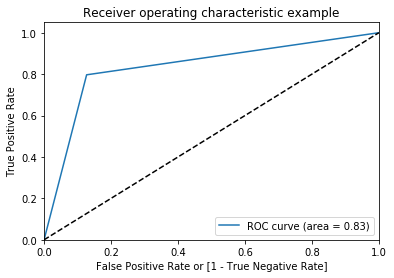

In [102]:
plt.figure(figsize = (10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train_df_rf.churn, y_train_df_rf.final_predicted, drop_intermediate = False )
draw_roc(y_train_df_rf.churn, y_train_df_rf.final_predicted)

In [103]:
# Find optimal cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df_rf[i]= y_train_df_rf.churn_Prob.map( lambda x: 1 if x > i else 0)
y_train_df_rf.head()

,churn,churn_Prob,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.46,0,1,1,1,1,1,0,0,0,0,0
1,0,0.25,0,1,1,1,0,0,0,0,0,0,0
2,0,0.06,0,1,0,0,0,0,0,0,0,0,0
3,0,0.21,0,1,1,1,0,0,0,0,0,0,0
4,0,0.16,0,1,1,0,0,0,0,0,0,0,0


In [104]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_train_df_rf.churn, y_train_df_rf[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   0.00   1.00
0.10  0.10      0.56   0.11   1.00
0.20  0.20      0.69   0.39   0.98
0.30  0.30      0.79   0.64   0.95
0.40  0.40      0.83   0.79   0.87
0.50  0.50      0.83   0.87   0.80
0.60  0.60      0.82   0.92   0.72
0.70  0.70      0.78   0.95   0.60
0.80  0.80      0.73   0.97   0.48
0.90  0.90      0.62   0.99   0.25


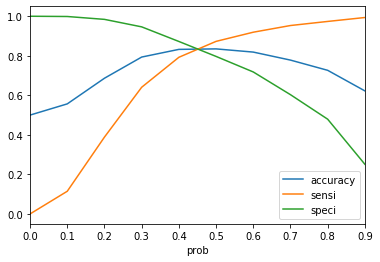

In [105]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [106]:
## We are choosing 0.5 cutoff

# accuracy. for cutoff o.5
print(metrics.accuracy_score(y_train_df_rf.churn, y_train_df_rf.final_predicted))

0.8348193458089265


In [107]:
importances = RF_model.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True), columns={'VarName', 'Importance'})
sorted_feature_importance


,VarName,Importance
0,0.25,arpu_7
1,0.21,arpu_6
2,0.17,arpu_8
3,0.07,std_og_mou_6
4,0.03,onnet_mou_7
5,0.03,roam_og_mou_6
6,0.03,std_og_mou_7
7,0.03,offnet_mou_6
8,0.03,roam_ic_mou_6
9,0.02,loc_og_mou_7


## Recommendation

#### Selection of model
- We would recommend to go with the Random Forest model which is giving the higheset accuracy of 85.56% at 0.5 cut-off
- Second best is Logistic Regression with 82.90% accuracy
- Performance of Logistic Regression with 79.89% 

#### Key variables having impact on the model are:
-            arpu_7
-            arpu_6
-            arpu_8
-      std_og_mou_6
-       onnet_mou_7
-     roam_og_mou_6
-      std_og_mou_7
-      offnet_mou_6
-     roam_ic_mou_6
-      loc_og_mou_7
-    roam_og_mou_8
-    roam_ic_mou_7
-      onnet_mou_6
-     loc_og_mou_6
-      onnet_mou_8
-    offnet_mou_7
-    roam_og_mou_7
-     offnet_mou_8
-    roam_ic_mou_8
-     loc_og_mou_8
 

#### Insights for business:

- The company should colect the feedback from the customers inorder to provide better service

- According to me the rates of STD, ISD and roaming rates are little bit high company should provide a reasonable rates packages to customers.   